In [1]:
%matplotlib inline
import cv2
import numpy as np
from matplotlib import pyplot as plt
import copy
from scipy import stats
!pip install imutils
import imutils
from math import pi
import queue

True

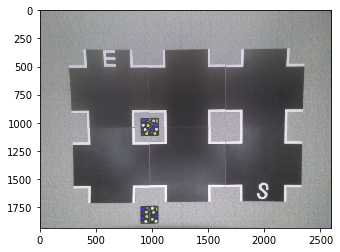

In [86]:
#base_path = "Drone Images/Base images/3_20200703180934.png"
base_path = "Drone Images/Base images/1593688961035.png"
base_image = cv2.imread(base_path,cv2.COLOR_BGR2RGB)
base_image = cv2.flip(base_image, 0)
plt.imshow(base_image)
cv2.imwrite("Drone Images/Base images/base.png", base_image)

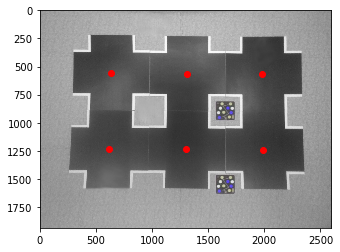

In [93]:
base_image = cv2.imread("Drone Images/Base images/edited.png",cv2.COLOR_BGR2RGB)

class Node:
    def __init__(self, px, py, label):
        self.px, self.py, self.label = px, py, label

keynodes = [
    Node(636, 1936 - 1378, 'l1'),
    Node(1310, 1936 - 1372, 'l2'),
    Node(1982, 1936 - 1368, 'l3'),
    Node(618, 1936 - 701, 'r1'),
    Node(1304, 1936 - 698, 'r2'),
    Node(1992, 1936 - 694, 'r3')
]

base_plot = plt.imshow(base_image)
for node in keynodes:
    plt.scatter(node.px, node.py, c = 'r')
plt.show()

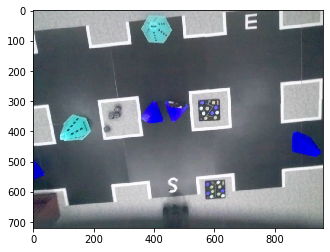

In [94]:
match_img = cv2.imread("Drone Images/Arena images/0.jpg")
plt.imshow(match_img)

In [97]:
#https://www.learnopencv.com/image-alignment-feature-based-using-opencv-c-python/
MAX_FEATURES = 100
GOOD_MATCH_PERCENT = 0.80
def alignImages(im1, im2):

  # Convert images to grayscale
  im1Gray = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY)
  im2Gray = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY)
  
  # Detect ORB features and compute descriptors.
  orb = cv2.ORB_create(MAX_FEATURES)
  keypoints1, descriptors1 = orb.detectAndCompute(im1Gray, None)
  keypoints2, descriptors2 = orb.detectAndCompute(im2Gray, None)
  
  # Match features.
  matcher = cv2.DescriptorMatcher_create(cv2.DESCRIPTOR_MATCHER_BRUTEFORCE_HAMMING)
  matches = matcher.match(descriptors1, descriptors2, None)
  
  # Sort matches by score
  matches.sort(key=lambda x: x.distance, reverse=False)

  # Remove not so good matches
  numGoodMatches = int(len(matches) * GOOD_MATCH_PERCENT)
  matches = matches[:numGoodMatches]

  # Draw top matches
  imMatches = cv2.drawMatches(im1, keypoints1, im2, keypoints2, matches, None)
  cv2.imwrite("matches.jpg", imMatches)
  plt.figure(figsize = (20,20))
  plt.imshow(imMatches)
  plt.figure()
  # Extract location of good matches
  points1 = np.zeros((len(matches), 2), dtype=np.float32)
  points2 = np.zeros((len(matches), 2), dtype=np.float32)

  for i, match in enumerate(matches):
    points1[i, :] = keypoints1[match.queryIdx].pt
    points2[i, :] = keypoints2[match.trainIdx].pt
  
  # Find homography
  h, mask = cv2.findHomography(points1, points2, cv2.RANSAC)

  # Use homography
  height, width, channels = im2.shape
  im1Reg = cv2.warpPerspective(im1, h, (width, height))
  
  return im1Reg, h

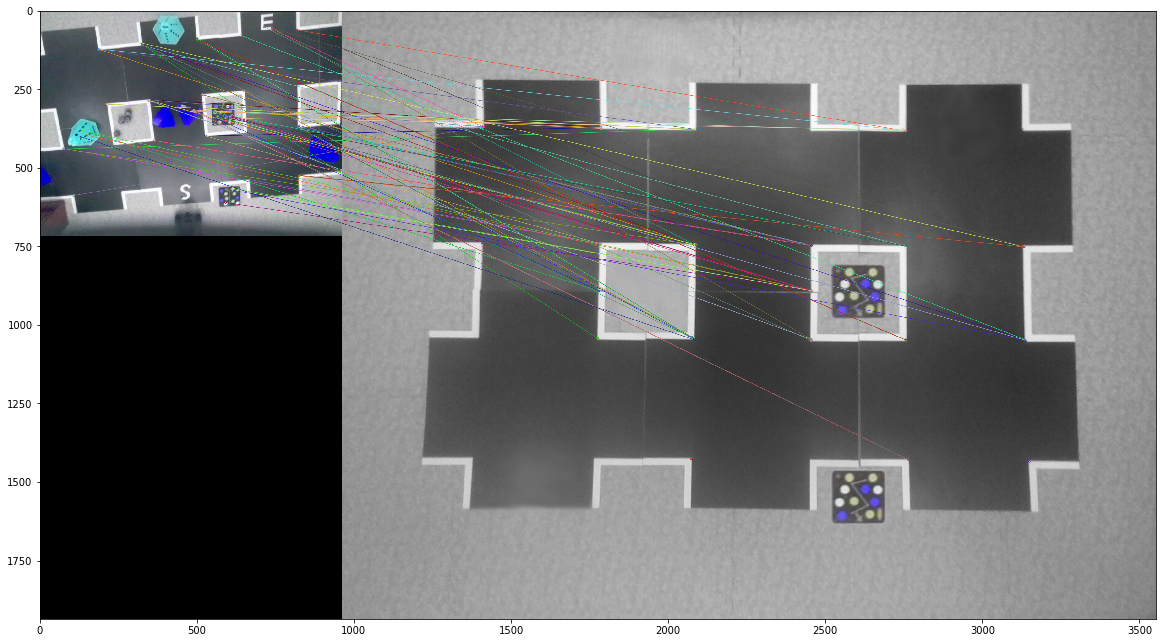

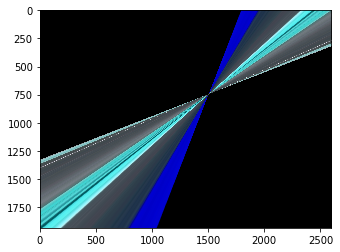

In [98]:
newim, _ = alignImages(match_img, base_image)
plt.imshow(newim)